# Model Interpretability
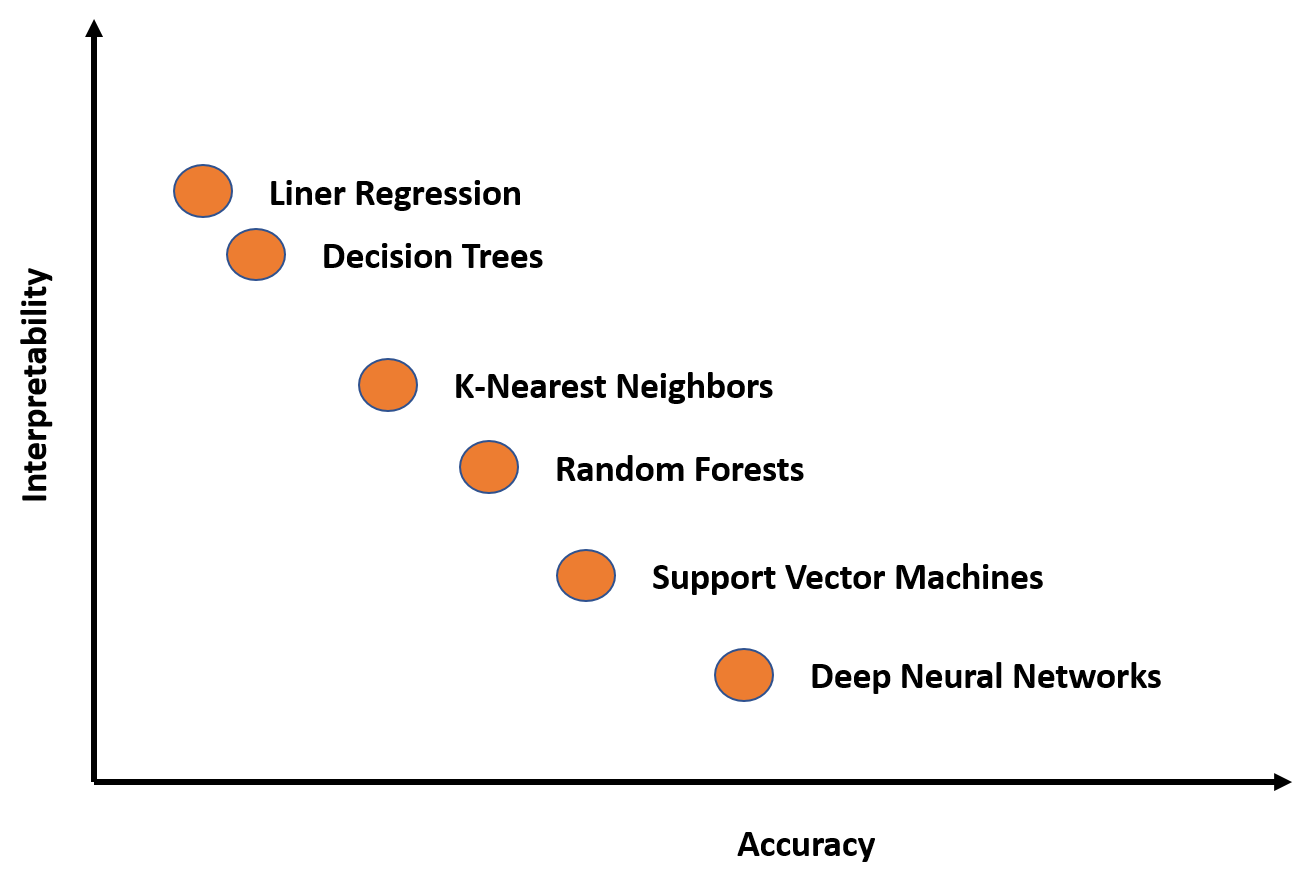

# Setup

In [2]:
!conda install shap --yes

Solving environment: / 
  - https://repo.continuum.io/pkgs/main/osx-64::cvxcanon-0.1.1-py36h6440ff4_0
  - defaults::cvxcanon-0.1.1-py36h6440ff4done

## Package Plan ##

  environment location: /Users/wilsons/anaconda3/envs/pyjup

  added / updated specs:
    - shap


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    imageio-2.6.1              |           py36_0         3.3 MB  conda-forge
    networkx-2.4               |             py_0         1.2 MB  conda-forge
    openssl-1.1.1d             |       h0b31af3_0         1.9 MB  conda-forge
    pywavelets-1.1.1           |   py36h3b54f70_0         4.3 MB  conda-forge
    scikit-image-0.15.0        |   py36h86efe34_2        27.6 MB  conda-forge
    shap-0.30.0                |   py36h86efe34_0         317 KB  conda-forge
    --------------------------------------

In [24]:
!conda install graphviz --yes

Solving environment: / 
  - https://repo.continuum.io/pkgs/main/osx-64::cvxcanon-0.1.1-py36h6440ff4_0
  - defaults::cvxcanon-0.1.1-py36h6440ff4done

## Package Plan ##

  environment location: /Users/wilsons/anaconda3/envs/pyjup

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    graphviz-2.40.1            |       h69955ae_1         6.5 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         6.5 MB

The following packages will be DOWNGRADED:

  graphviz                                2.40.1-ha626266_1 --> 2.40.1-h69955ae_1



graphviz-2.40.1      | 6.5 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [174]:
!conda install python-graphviz --yes

Solving environment: \ 
  - https://repo.continuum.io/pkgs/main/osx-64::cvxcanon-0.1.1-py36h6440ff4_0
  - defaults::cvxcanon-0.1.1-py36h6440ff4done

## Package Plan ##

  environment location: /Users/wilsons/anaconda3/envs/pyjup

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python-graphviz-0.13.2     |             py_0          18 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          18 KB

The following NEW packages will be INSTALLED:

  python-graphviz    conda-forge/noarch::python-graphviz-0.13.2-py_0



python-graphviz-0.13 | 18 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [194]:
!pip install lime

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz
from IPython.display import Image

import xgboost as xgb

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

import shap
import lime
import lime.lime_tabular

# Data

In [12]:
boston = load_boston()
bostonDF = pd.DataFrame(boston['data'], columns=boston['feature_names'])
bostonDF['TARGET'] = boston['target']

In [161]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [13]:
bostonDF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


# Methods
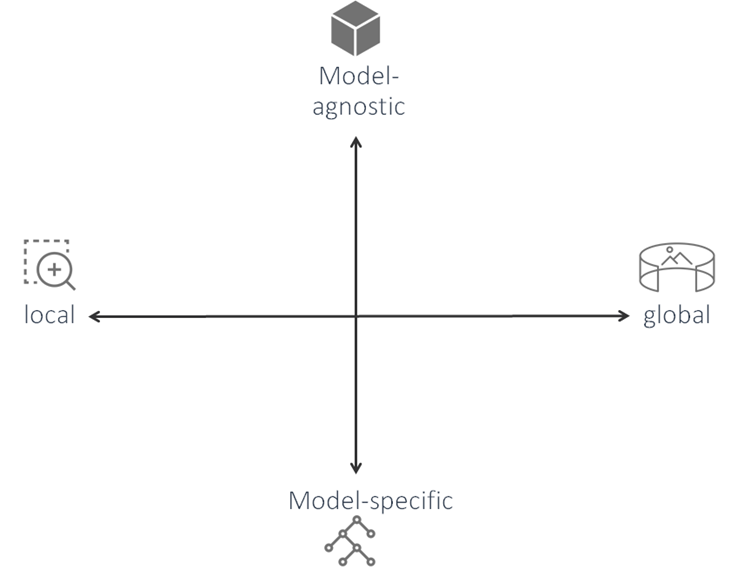

## Global vs Local
* https://towardsdatascience.com/explainable-artificial-intelligence-part-3-hands-on-machine-learning-model-interpretation-e8ebe5afc608
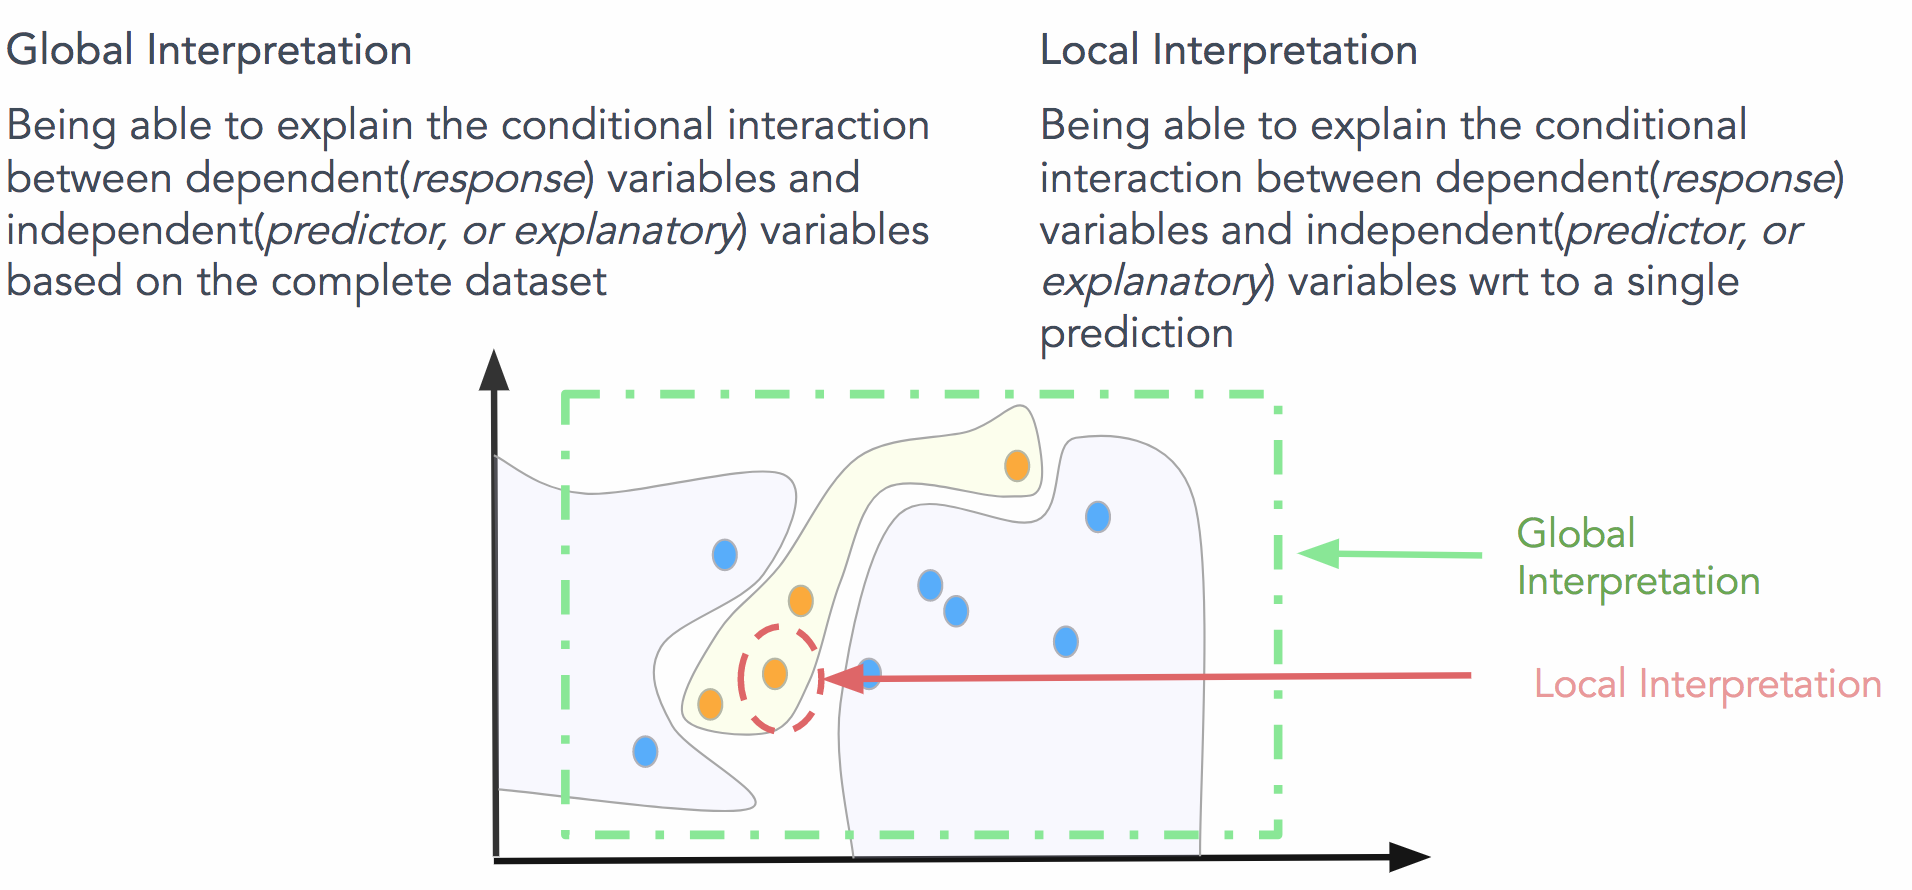

## Model vs Agnostic
* https://www.slideshare.net/0xdata/explaining-blackbox-machine-learning-predictions/
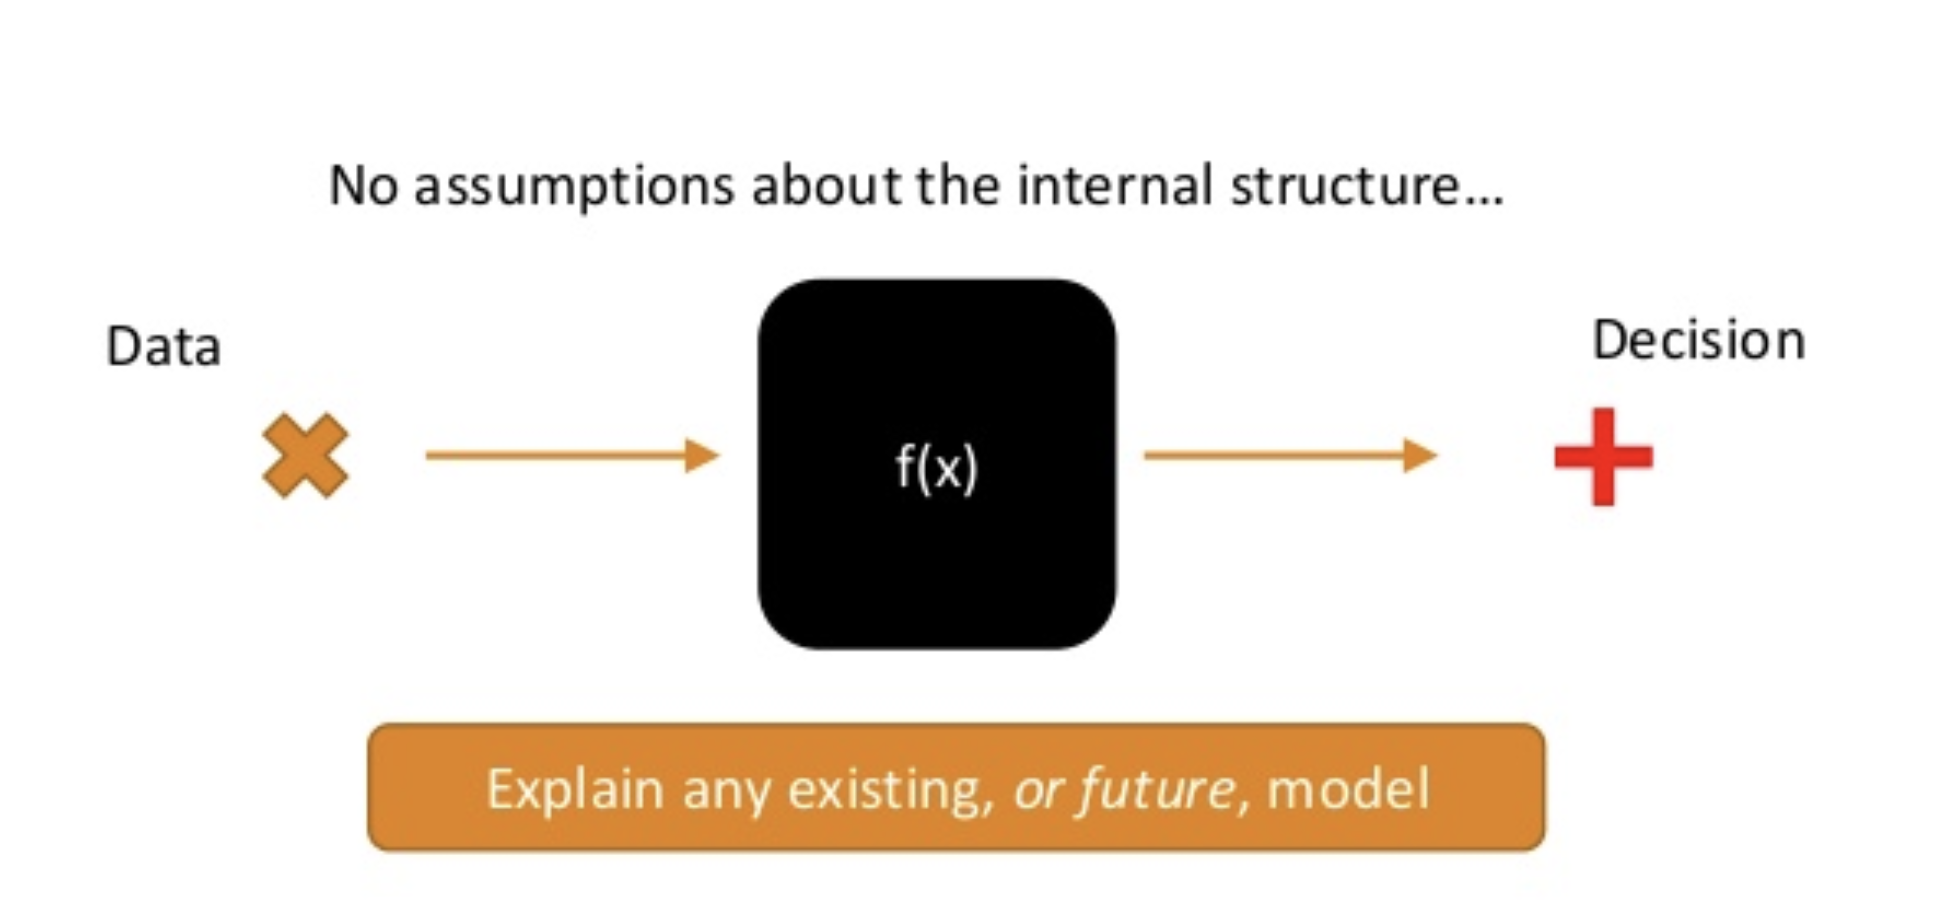

# Local - Model Based
* Explain an individual data point
* Look at two approaches widely accepted as interpretable:
 * Linear Regression
 * Decision Tree

## Linear Regression
* Statsmodel Output
* How does a change in 1 unit of X affect Y
* Coefficients are a measure of importance
 * Large = More important
 * Coefficient +- Std Error around 0 are insignificant

In [40]:
local = ols('TARGET ~ PTRATIO + NOX + RM + LSTAT + DIS ', bostonDF).fit()
print(local.summary())

                            OLS Regression Results                            
Dep. Variable:                 TARGET   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     242.6
Date:                Mon, 11 Nov 2019   Prob (F-statistic):          3.67e-131
Time:                        17:47:47   Log-Likelihood:                -1528.7
No. Observations:                 506   AIC:                             3069.
Df Residuals:                     500   BIC:                             3095.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.4992      4.613      8.129      0.0

## Decision Tree

In [181]:
dtree = DecisionTreeRegressor(criterion='mse',     # Initialize and fit regressor
                             max_depth=3)         
dtree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

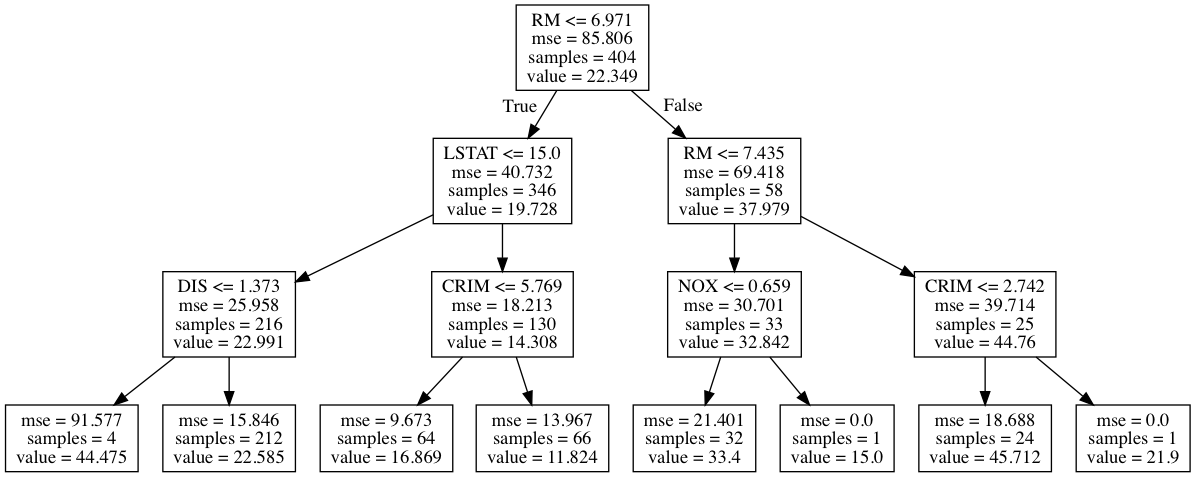

In [191]:
dot_data = tree.export_graphviz(dtree, out_file=None, feature_names=X_train.columns, class_names=False)
graph = graphviz.Source(dot_data)
graph.format = "png"
Image(data=graph.pipe())

# Global - Model Based
* XGBoost Model
* Tree Importance
* What are the most important features in predicting an output?

## Train & Test

In [15]:
X = bostonDF.copy()
y = X['TARGET']
X = X.drop(columns=['TARGET'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=888)

## Learn

In [19]:
boost = xgb.XGBRegressor(objective ='reg:linear', 
                          colsample_bytree = 0.3, 
                          learning_rate = 0.1,
                          max_depth = 5, 
                          alpha = 10, 
                          n_estimators = 10)

In [20]:
boost.fit(X_train, y_train)
preds = boost.predict(X_test)

/Users/wilsons/anaconda3/envs/pyjup/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


## Predict

In [21]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 10.263212


## Interpret
* Global Importance

<Figure size 720x576 with 0 Axes>

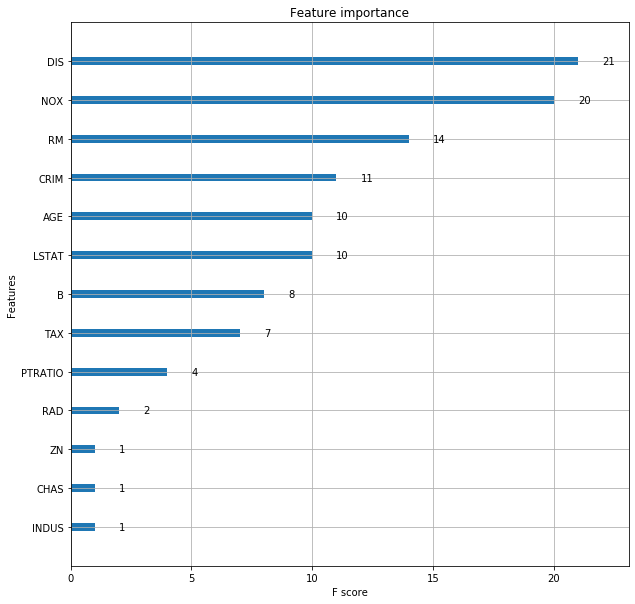

In [32]:
plt.figure(figsize=(10,8))
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

# Model Agnostic Frameworks
## Shap
* Shap values consider all possible predictions for an instance using all possible combinations of inputs. 
* Exhaustive which can guarantee consistency and local accuracy.
* Exhaustive comes at a computational cost.
* http://papers.nips.cc/paper/7062-a-unified-approach-to-interpreting-model-predictions.pdf
* https://towardsdatascience.com/how-to-avoid-the-machine-learning-blackbox-with-shap-da567fc64a8b
* https://github.com/slundberg/shap

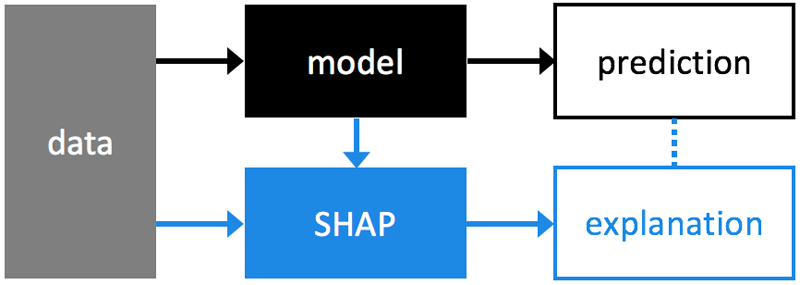

In [199]:
sh_explainer = shap.TreeExplainer(boost)
sh_values      = explainer.shap_values(X_train)
sh_expected_value   = explainer.expected_value
sh_interactions     = explainer.shap_interaction_values(X_train)
sh_feature_names    = list(X_train.columns)

## Lime
* Explains prediction of any classifier in an interpretable and faithful manner by learning an interpretable model locally around the prediction
* https://towardsdatascience.com/decrypting-your-machine-learning-model-using-lime-5adc035109b5
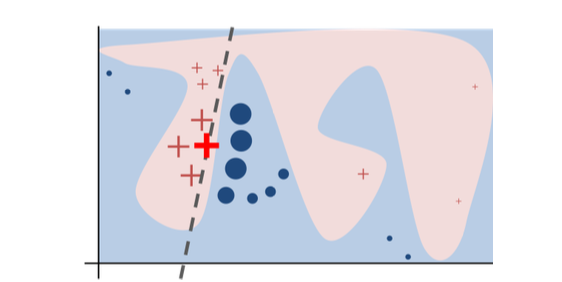

In [245]:
lime_explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                        feature_names=list(X_train.columns),                                                        
                                                        categorical_features=[],
                                                        verbose=True, mode='regression')

# Global - Model Agnostic

## Importance

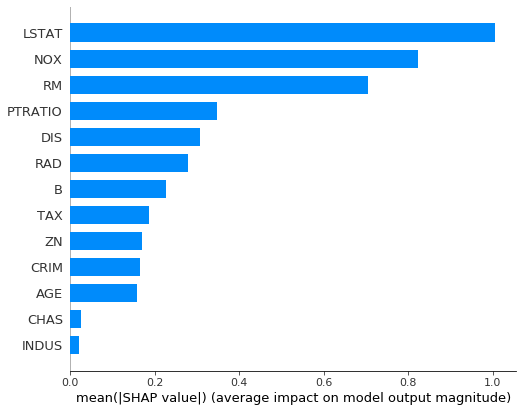

In [200]:
shap.summary_plot(sh_values, X, plot_type='bar')

# Local - Model Agnostic

## Decision Plot
* X values is the model output
* X axis is centered on expected_value of the explainer
* Y axis losts features is order of importance
* From bottom to top
 * Output starts at expected value
 * Each line is an observation
 * Each feature's contribution is added
 * The top line is the final predicted value
 * Color of line comes from final predicted value (blue - red gradient)
* Plot of a single observation includes it's values

### All Observations

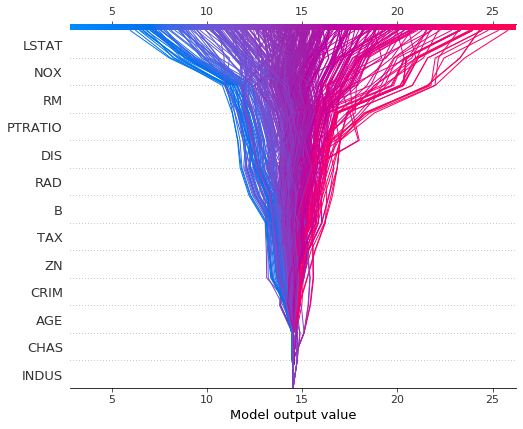

In [201]:
shap.decision_plot(sh_expected_value, sh_values, feature_names=feature_names)

### Single Observation

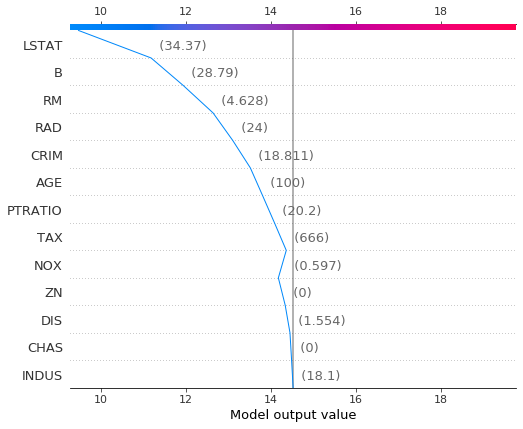

In [202]:
shap.decision_plot(sh_expected_value, sh_values[0], X_train.iloc[0,:], feature_names=sh_feature_names)

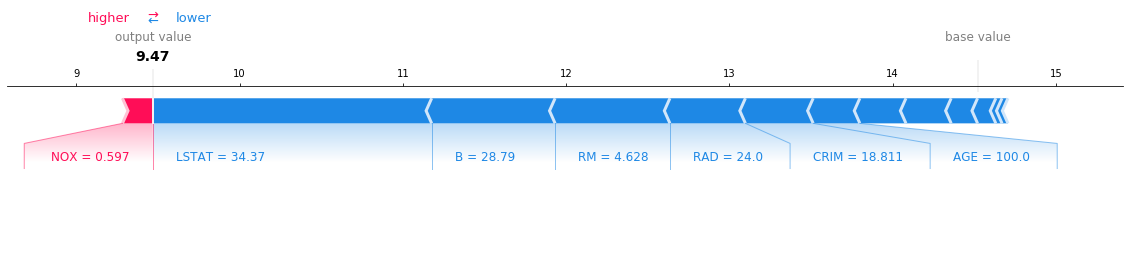

In [203]:
shap.force_plot(sh_expected_value, sh_values[0], X_train.iloc[0,:], matplotlib=True)

In [252]:
xplain = lime_explainer.explain_instance(X_train.iloc[0],
                                predict_fn=dtree.predict)
xplain.show_in_notebook(show_table=True)

Intercept 26.001952797851573
Prediction_local [14.92710578]
Right: 11.824242424242424


## Dependency Plot

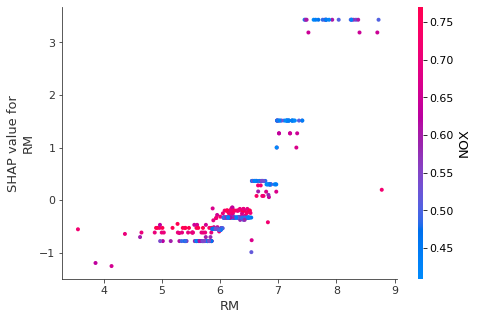

In [204]:
shap.dependence_plot('RM', sh_values, X_train)

## Interaction Values

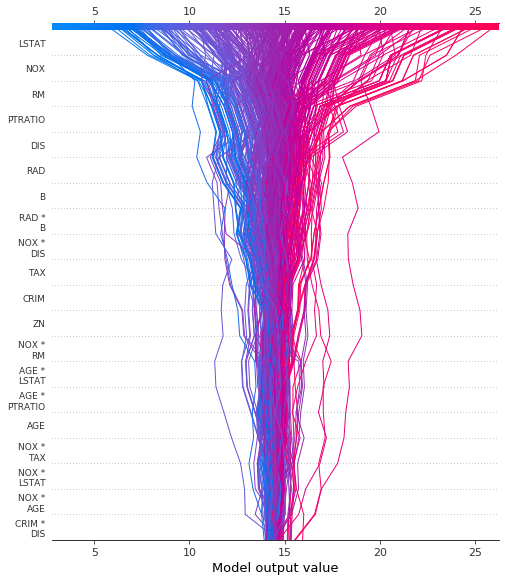

In [254]:
shap.decision_plot(sh_expected_value, 
                   sh_interactions, 
                   feature_names=feature_names)

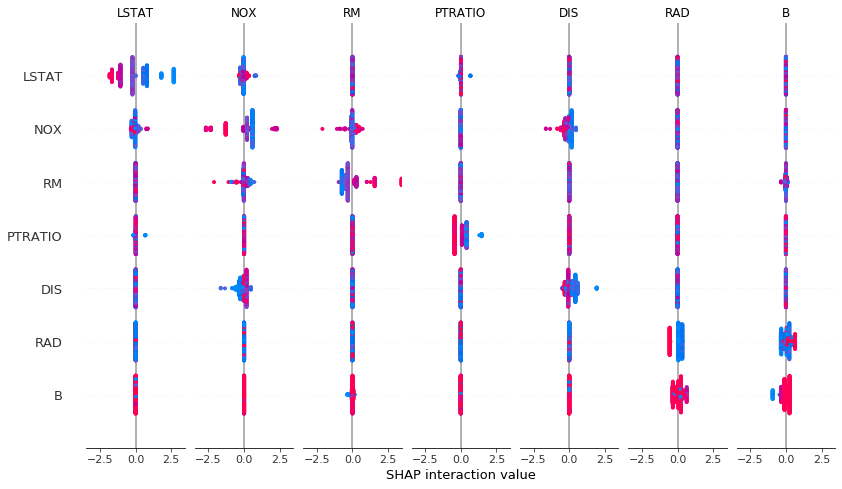

In [205]:
shap.summary_plot(sh_interactions, X_train)

### Main Effects

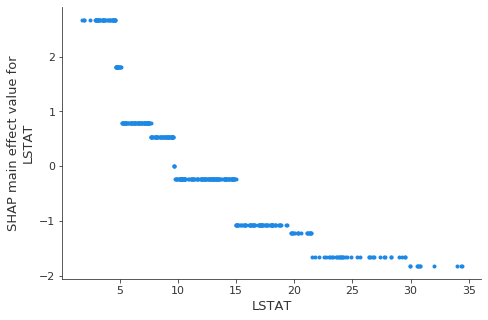

In [206]:
shap.dependence_plot( ('LSTAT', 'LSTAT') , sh_interactions, features=X_train)

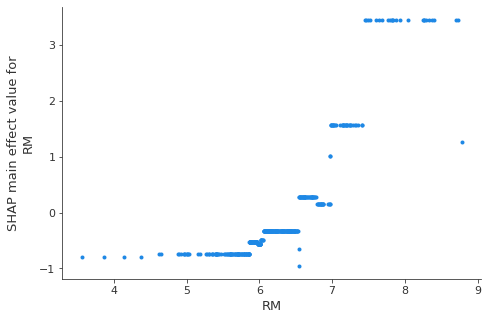

In [207]:
shap.dependence_plot( ('RM', 'RM') , sh_interactions, features=X_train)

### Interaction Effects

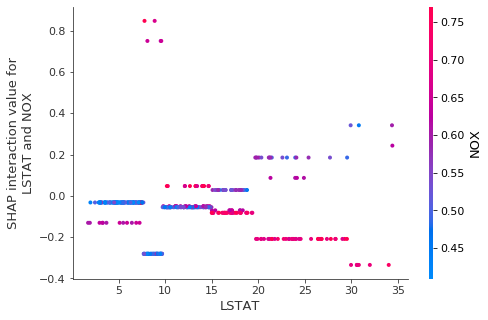

In [208]:
shap.dependence_plot( ('LSTAT', 'NOX') , sh_interactions, features=X_train)

# Counterfactuals
* Find the "smallest" change that flips the decision
 * Alibi Module
 * Expanding circle
* Adverserial
 * A counterfactual with intent to deceive

## Counterfactual Example
* https://christophm.github.io/interpretable-ml-book/counterfactual.html
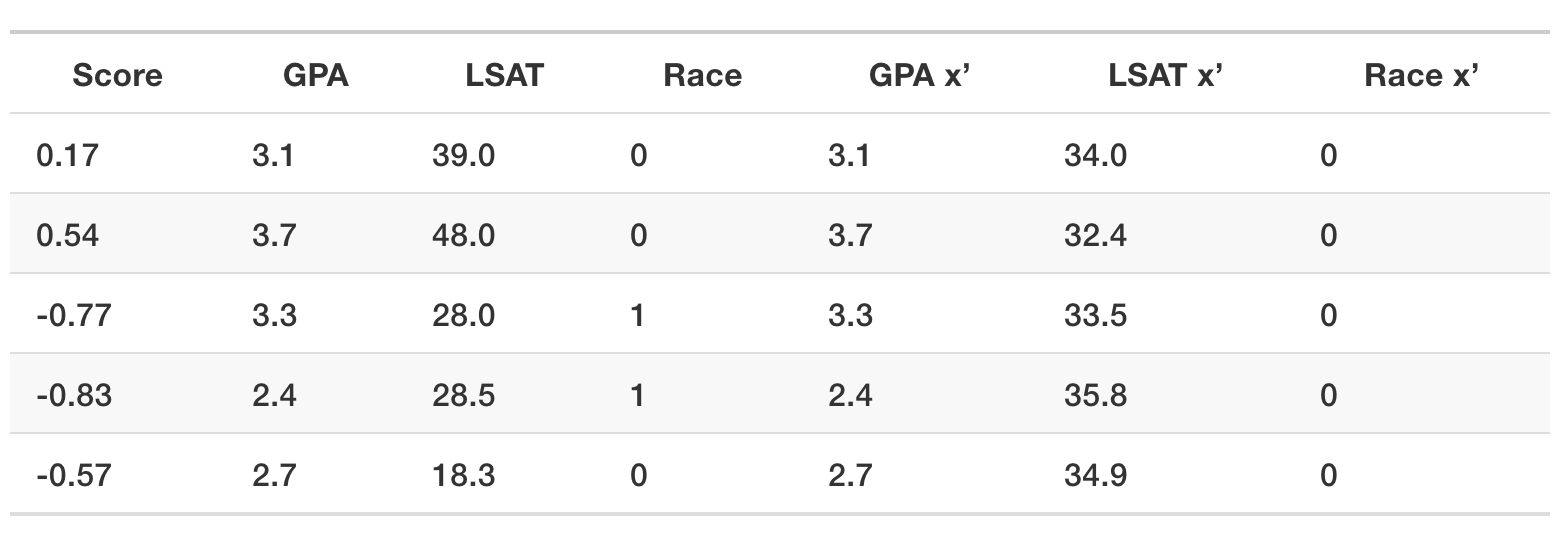

## Adverserial Example
* https://christophm.github.io/interpretable-ml-book/adversarial.html#methods-and-examples
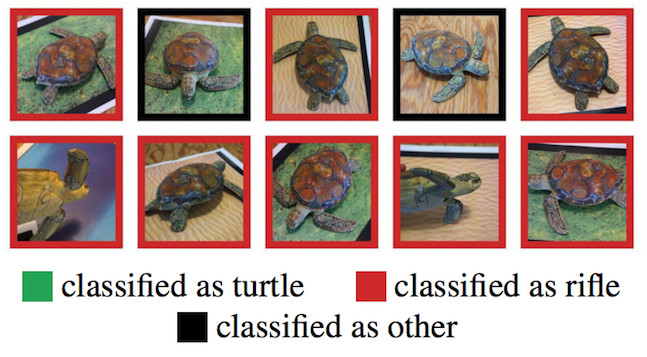

# Conclusion
* Explanability and complexity doesn't have to be a tradeoff
 * Model Agnostic Approaches
 * Shap (https://github.com/slundberg/shap)
 * Lime (https://github.com/marcotcr/lime)
 * Skater (Fork of Lime - https://github.com/oracle/Skater)
 * ELI5 (https://github.com/TeamHG-Memex/eli5)
 * Tree Interpreter (http://blog.datadive.net/interpreting-random-forests/)
* Tools
 * Feature Importance (Global - Use entire dataset)
 * Decision Plot
 * Dependence Plot 
 * Interaction Plot
* Lime vs Shap
 * Shap optimized for XGBoost (Problems with Lime and XGBoost)
 * Some differences arise (Different approaches)
 * Shap can be slow (Lime is fast)
* Model Agnostic Models
 * Will continue to evolve & improve
 * AutoML needs Model Agnostic
 * Helpful with bias
   * Weapons of Math Destruction